In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df_train1= pd.read_csv('WDBC_Train.csv')
df_train = df_train1.iloc[:, 1:]
# print(df_train)
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

In [4]:
features = X.columns[0:]
pca = PCA()
pca.fit(X[features])
### eigenvalues
eigenvalues = pca.explained_variance_
### eigenvectors
variance_ratios = pca.explained_variance_ratio_

In [5]:
print(eigenvalues)
print(variance_ratios)

[4.12185568e+05 7.84276305e+03 7.03791734e+02 5.50284094e+01
 3.80519540e+01 2.80566690e+00 1.96987922e+00 3.30079712e-01
 1.46971276e-01 9.59788419e-02 3.35397937e-02 8.04212599e-03
 3.14242225e-03 2.14755576e-03 1.20478099e-03 6.39497376e-04
 4.19433051e-04 2.39770957e-04 1.93151182e-04 1.51280593e-04
 7.15219137e-05 5.44089900e-05 3.69655052e-05 2.47461284e-05
 1.35139503e-05 1.21699180e-05 3.97125060e-06 2.71298907e-06
 1.92870815e-06 6.77429390e-07]
[9.79457212e-01 1.86363896e-02 1.67238725e-03 1.30761426e-04
 9.04210717e-05 6.66697454e-06 4.68093151e-06 7.84352923e-07
 3.49240944e-07 2.28070016e-07 7.96990371e-08 1.91101264e-08
 7.46719046e-09 5.10313593e-09 2.86286450e-09 1.51960759e-09
 9.96679067e-10 5.69756468e-10 4.58976084e-10 3.59480971e-10
 1.69954165e-10 1.29289528e-10 8.78393944e-11 5.88030631e-11
 3.21125656e-11 2.89188048e-11 9.43669635e-12 6.44674856e-12
 4.58309861e-12 1.60974365e-12]


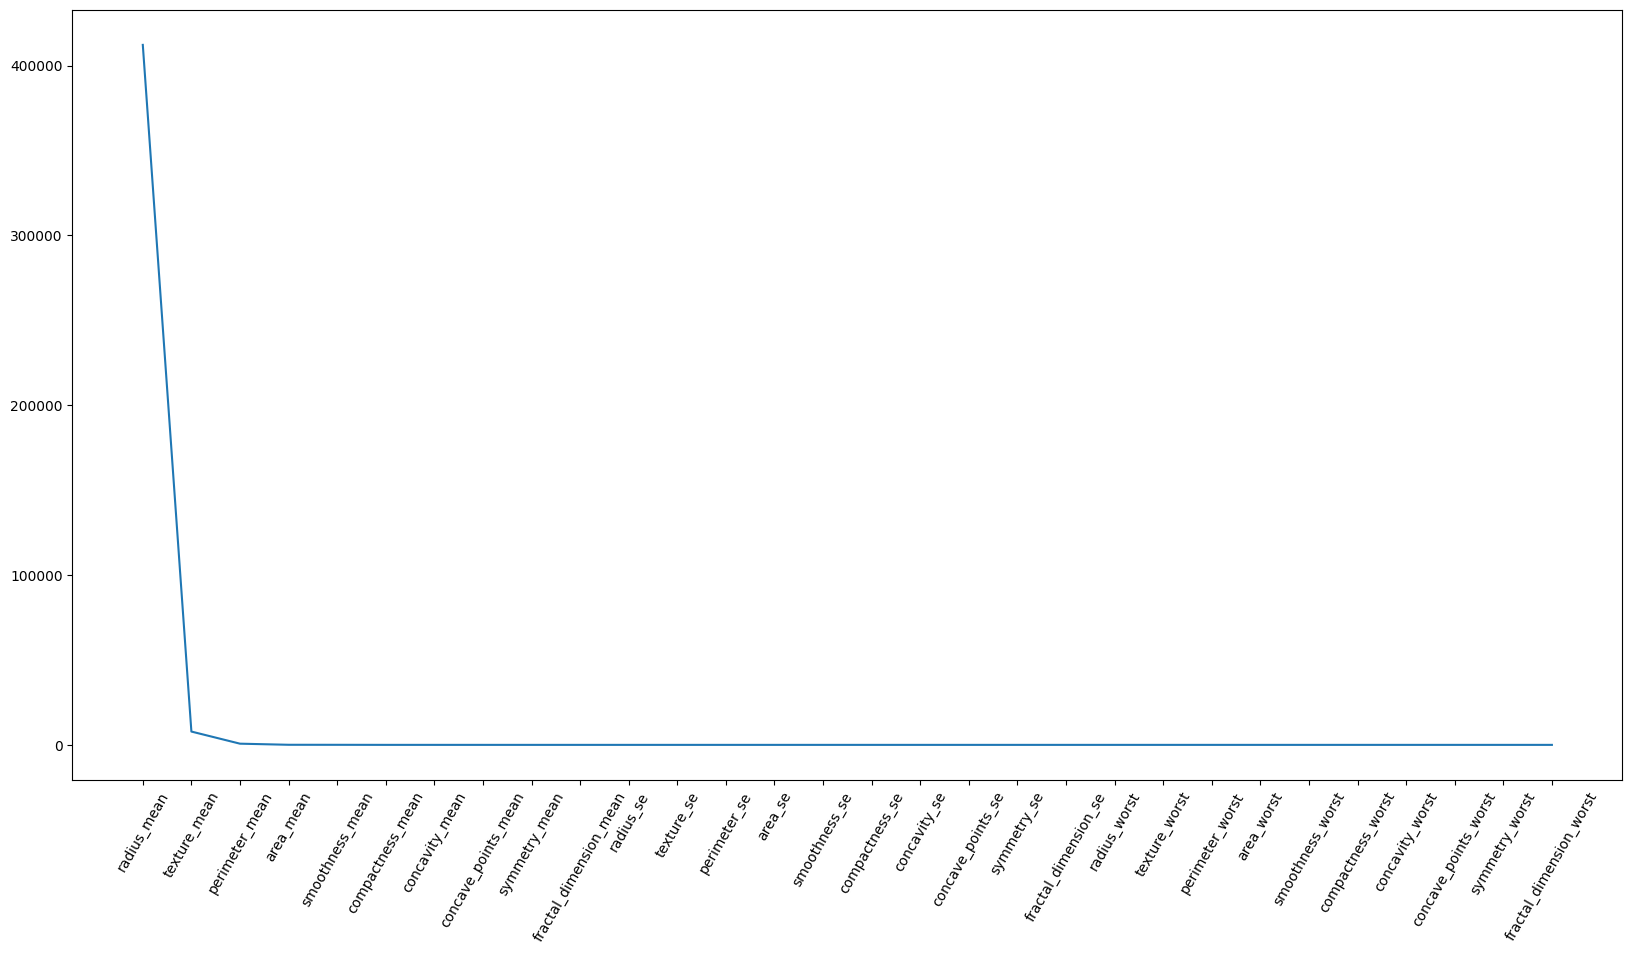

In [6]:
plt.figure(figsize=(20,10))
plt.plot(features, eigenvalues)
plt.xticks(rotation=60)
# plt.ylabel('Eigen value')
plt.show()

In [7]:
train_pca = pd.DataFrame(pca.fit_transform(X[features]))
matrix= pd.DataFrame(pca.get_covariance())
matrix.columns=X.columns
matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,12.184709,4.552912,83.439161,1189.349922,0.008012,0.086523,0.170944,0.106929,0.009562,-0.008625,...,15.968465,5.963867,109.877740,1794.755757,0.010250,0.194349,0.332685,0.162759,0.029133,-0.004124
1,4.552912,18.973931,31.667954,439.390651,-0.003746,0.045612,0.081470,0.041430,0.008636,-0.003270,...,6.915707,24.322167,48.576047,777.436848,0.005000,0.153609,0.198844,0.069159,0.032693,0.004538
2,83.439161,31.667954,574.085832,8152.201231,0.069211,0.663552,1.256689,0.763221,0.092292,-0.050296,...,109.528043,41.667797,758.357724,12303.733252,0.089989,1.503610,2.485452,1.163685,0.244040,-0.008825
3,1189.349922,439.390651,8152.201231,118757.842392,0.826138,8.443669,17.193894,10.583917,1.041129,-0.770490,...,1562.709898,559.535408,10756.677234,179580.395929,1.035050,18.109542,32.082671,15.615218,2.419461,-0.370639
4,0.008012,-0.003746,0.069211,0.826138,0.000209,0.000527,0.000650,0.000323,0.000207,0.000065,...,0.013826,0.001813,0.110684,1.508971,0.000282,0.001117,0.001432,0.000510,0.000358,0.000139
5,0.086523,0.045612,0.663552,8.443669,0.000527,0.002777,0.003702,0.001677,0.000888,0.000216,...,0.124312,0.072706,0.968938,13.502065,0.000762,0.007022,0.008924,0.002804,0.001776,0.000632
6,0.170944,0.081470,1.256689,17.193894,0.000650,0.003702,0.006284,0.002756,0.001161,0.000218,...,0.234827,0.119684,1.748358,26.470646,0.000918,0.009060,0.014388,0.004348,0.002148,0.000725
7,0.106929,0.041430,0.763221,10.583917,0.000323,0.001677,0.002756,0.001462,0.000482,0.000048,...,0.146163,0.061191,1.048222,16.403237,0.000445,0.003846,0.005808,0.002259,0.000905,0.000234
8,0.009562,0.008636,0.092292,1.041129,0.000207,0.000888,0.001161,0.000482,0.000759,0.000101,...,0.019194,0.015933,0.170253,2.137915,0.000272,0.002100,0.002653,0.000772,0.001218,0.000227
9,-0.008625,-0.003270,-0.050296,-0.770490,0.000065,0.000216,0.000218,0.000048,0.000101,0.000053,...,-0.009569,-0.002978,-0.053575,-1.022781,0.000093,0.000544,0.000602,0.000092,0.000168,0.000105


In [9]:
pca2 = PCA(n_components=2)

### Fit and transform train data
train_pca2 = pd.DataFrame(pca2.fit_transform(X[features]))

In [23]:
val1=pd.read_csv('WDBC_Validation.csv')
test1=pd.read_csv('WDBC_Test.csv')

val = val1.iloc[:, 1:]
test = test1.iloc[:, 1:]

val_X = val.iloc[:, :-1]
val_y = val.iloc[:, -1]

test_X = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

train_pca2_test = pd.DataFrame(pca2.transform(test_X[features]))
train_pca2_val = pd.DataFrame(pca2.transform(val_X[features]))

train_pca2_test['diagnosis'] = test_y
train_pca2_val['diagnosis'] = val_y
train_pca2['diagnosis'] = y

In [24]:
train_pca2.to_csv('WDBC_PCA2_Train.csv')
train_pca2_test.to_csv('WDBC_PCA2_Test.csv')
train_pca2_val .to_csv('WDBC_PCA2_Validation.csv')

In [25]:
pca10 = PCA(n_components=10)

### Fit and transform train data
train_pca10 = pd.DataFrame(pca10.fit_transform(X[features]))

train_pca10_test = pd.DataFrame(pca10.transform(test_X[features]))
train_pca10_val = pd.DataFrame(pca10.transform(val_X[features]))

train_pca10_test['diagnosis'] = test_y
train_pca10_val['diagnosis'] = val_y
train_pca10['diagnosis'] = y

In [26]:
train_pca10.to_csv('WDBC_PCA10_Train.csv')
train_pca10_test.to_csv('WDBC_PCA10_Test.csv')
train_pca10_val .to_csv('WDBC_PCA10_Validation.csv')